In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy
import math

In [2]:
w1 = np.array([[2, 6], [3, 4], [3, 8], [4, 6]])
w2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])


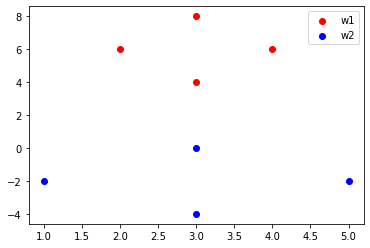

In [3]:
# before drwaing decision boundary plot the data
plt.scatter(w1[:, 0], w1[:, 1], label='w1',c='red')
plt.scatter(w2[:, 0], w2[:, 1], label='w2',c='blue')
plt.legend()
plt.show()
# getting the mean of the data for both classes

## Step 1: Calculate the mean of the data for both classes

In [5]:
mean1 = np.mean(w1, axis=0)
mean2 = np.mean(w2, axis=0)
# displaying the mean
print("The means of 2 classes are: ",mean1,mean2)

The means of 2 classes are:  [3. 6.] [ 3. -2.]


## Step 2: Calculate the covariance matrix for both classes 

In [7]:
# getting the covariance matrix
z1=np.matrix(w1-mean1)
z2=np.matrix(w2-mean2)
cov1=np.matmul(z1.T,z1)
cov2=np.matmul(z2.T,z2)
# displaying the covariance matrix
print('Covariance matrix of 2 classes are:\n', cov1,'\n\n', cov2)


Covariance matrix of 2 classes are:
 [[2. 0.]
 [0. 8.]] 

 [[8. 0.]
 [0. 8.]]


In [8]:
def decision_boundary(w1,w2):
    n=len(w1)
    d=len(w1[0])

    a1=-0.5*(np.linalg.inv(cov1))
    a2=-0.5*(np.linalg.inv(cov2))
    b1=np.matmul(np.linalg.inv(cov1),mean1.T)
    b2=np.matmul(np.linalg.inv(cov2),mean2.T)
    c10=-0.5*np.matmul(np.matmul(mean1,np.linalg.inv(cov1)),mean1.T)-0.5*math.log(np.linalg.det(cov1))
    c20=-0.5*np.matmul(np.matmul(mean2,np.linalg.inv(cov2)),mean2.T)-0.5*math.log(np.linalg.det(cov2))
    c10-=c20
    a1-=a2
    b1=b1.T-b2.T 
    x = np.linspace(-2,7,100)
    for i in range(len(w1)):
        plt.scatter(w1[i][0],w1[i][1],c="red")
        plt.scatter(w2[i][0],w2[i][1],c="green")
    y=np.array((-np.sum(a1[0])/b1.item(1))*(x**2)-(b1.item(0)/b1.item(1))*x-(c10/b1.item(1)))[0]
    y=y.flatten()
    plt.legend(['w1','w2'],loc="upper left")
    plt.title("The decision boundary between class1 and class2")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.plot(x,y,c="blue")
    plt.show()


## Step 4: Plot the decision boundary

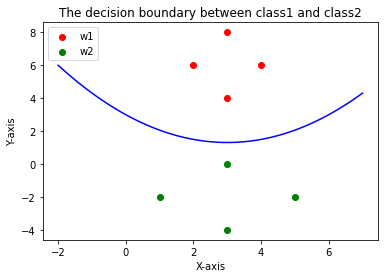

In [9]:
decision_boundary(w1,w2)